## ¿Quién cuida a quienes nos cuidaron? 
Cuba enfrenta una situación económica compleja que afecta de manera significativa a su población, especialmente a los adultos mayores. Actualmente, más del 25% de los cubanos tienen 60 años o más, una cifra que refleja el envejecimiento progresivo de la sociedad cubana. Este grupo enfrenta grandes desafíos, ya que la pensión mínima estatal ronda los 3056 cup, una cantidad que resulta insuficiente para cubrir las necesidades básicas en un contexto de alta inflación y fluctuación del dólar.

En 2025, el valor del dólar en el mercado cubano ha experimentado una variación considerable, llegando a superar los 400 pesos cubanos por dólar, lo que ha generado un aumento en los precios de productos y servicios, afectando directamente el poder adquisitivo de los adultos mayores.

In [ ]:
import json
import matplotlib.pyplot as plt

def grafico_precio_usd(archivo_json):
# Cargar los datos del archivo JSON
    with open('precio_usd.json', 'r', encoding='utf-8') as file:
        data = json.load(file)

    # Acceder a la lista de precios dentro de la clave "precio"
    precios = data["precio"]

    # Extraer fechas y valores de USD (sin convertir fechas a datetime)
    fechas = [item['fecha'] for item in precios]
    valores_usd = [item['usd'] for item in precios]

    # Crear la gráfica
    plt.figure(figsize=(14, 6))
    plt.plot(fechas, valores_usd, marker='o', linestyle='-', color='#9b7e59', label='USD en CUP')
    plt.title('Evolución del precio del USD')
    plt.xlabel('Fecha')
    plt.ylabel('Precio en CUP')
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()

grafico_precio_usd("precio_usd.json")

Cada vez es más común ver cómo abren pequeñas tiendas particulares en casi cada esquina. Estos negocios han logrado llenar vacíos que el mercado estatal no siempre puede cubrir. Sin embargo, para muchos, es casi imposible comprar en ellos. Una jabita con productos básicos puede costar lo mismo que todo lo que reciben en un mes, la población hace lo posible para estirar cada peso. El contraste entre la abundancia de las tiendas y la escasez en los bolsillos de los más vulnerables pinta una realidad dura: el progreso de unos parece ir dejando atrás a otros.

In [ ]:
def calcular_promedio_precios(ruta_archivo):
    with open("tiendas.json", 'r', encoding='utf-8') as file:
        data = json.load(file)

    acumulador = {}  # {tipo: [lista de precios]}

    for tienda in data.get("stores", []):
        for producto in tienda.get("products", []):
            tipo = producto["type"]
            precio_str = producto["price"].split()[0]  # "750 cup" → "750"

            # Validar que el precio es numérico antes de convertir
            if precio_str.replace('.', '', 1).isdigit():
                precio = float(precio_str)
                if tipo not in acumulador:
                    acumulador[tipo] = []
                acumulador[tipo].append(precio)

    promedios = {}
    for tipo in acumulador:
        precios = acumulador[tipo]
        if precios:
            promedios[tipo] = sum(precios) / len(precios)

    return promedios

import matplotlib.pyplot as plt

def graficar_promedio_precios(promedios):
    keys = list(promedios.keys())
    values = list(promedios.values())

    plt.figure(figsize=(10, 6))
    plt.bar(keys, values, color='orange')
    plt.title("Precio promedio por tipo de producto")
    plt.xlabel("Tipo de producto")
    plt.ylabel("Precio promedio (CUP)")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

ruta = "tiendas.json"
promedios = calcular_promedio_precios("ruta")
graficar_promedio_precios(promedios)

Los mercados estatales que venden en moneda nacional (CUP) enfrentan una creciente escasez de productos básicos, lo que obliga a los consumidores a realizar sus compras en mercados particulares. La mayoría de estos vendedores particulares fijan sus precios en función del dólar estadounidense (USD), dada la fuerte influencia de esta moneda en la economía cubana. Esta dolarización informal ha llevado al gobierno a implementar topes en los precios de algunos productos esenciales para intentar controlar la inflación y proteger a la población. Sin embargo, estas medidas no siempre logran frenar el aumento generalizado de precios, y la escasez persiste, afectando especialmente a los adultos mayores que dependen de ingresos fijos y limitados.

| Productos      | Unidad de medida | Precio |
|----------------|------------------|--------|
| Leche en polvo | 1 kg             | 1045   |
| Pastas alimenticias | 1 kg        | 835    |
| Pastas alimenticias | 500 g       | 417    |
| Aceite         | 1 l              | 900    |
| Aceite         | 900 ml           | 810    |
| Aceite         | 800 ml           | 720    |
| Aceite         | 700 ml           | 630    |

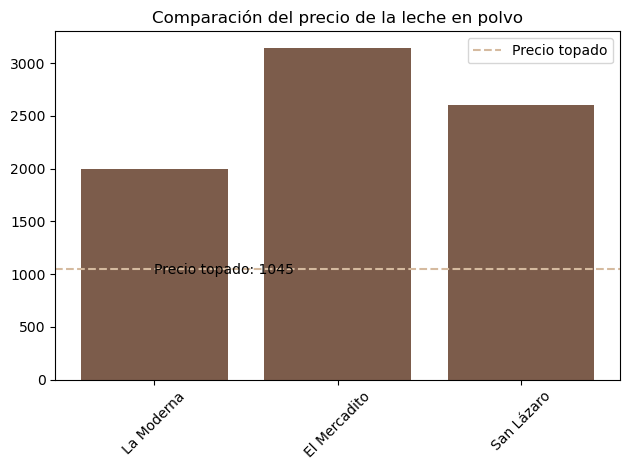

In [5]:
import json
import matplotlib.pyplot as plt
import os

# Load JSON data
def grafico_lecheenpolvo(archive):
    with open("tiendas.json", "r", encoding="utf-8") as file:
        data = json.load(file)

    store_prices = []
    for store in data["stores"]:
        store_name = store["names"]
        for product in store["products"]:
            if product["type"] == "Leche en polvo" and product["net weight"] == "1 kg":
                price_str = product["price"].replace(" cup", "").strip()
                if price_str.isdigit():
                    store_prices.append((store_name, int(price_str)))

    store_names = [name for name, _ in store_prices]
    prices = [price for _, price in store_prices]

    plt.bar(store_names,prices,color="#7c5c4b")
    plt.axhline(y=1045,color="#d5ba9f",ls="--",label="Precio topado")
    plt.legend()
    plt.title("Comparación del precio de la leche en polvo")
    plt.annotate("Precio topado: 1045",(1,2000),(0,1000))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grafico_lecheenpolvo("tiendas.json")

Recientemente, en La Habana han surgido muchas tiendas estatales que venden productos en dólares (USD), una medida tomada por el Estado para obtener divisas en medio de la compleja situación económica. Estas tiendas ofrecen una mayor variedad de alimentos y productos esenciales, sin embargo, sus precios son mucho más altos que los del mercado en moneda nacional, lo que hace que muchas personas no puedan acceder a ellos fácilmente. Los adultos mayores nuevamente son los más afectados, debidoo a que su mayoría dependen únicamente de pensiones en pesos cubanos que no alcanzan para cubrir estos costos. Para ellos, conseguir alimentos básicos como leche, aceite o productos de higiene personal se vuelve casi imposible sin la ayuda económica de familiares más jóvenes, ya sea para hacer las compras o para proporcionar la moneda extranjera necesaria. Esta dependencia aumenta la vulnerabilidad de un grupo que ya enfrenta muchos retos en su día a día.

In [6]:
#grafica de precios de las tiendas usd contra el promedio en usd de los mismos productos en las mipymes